## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
df_load = pd.read_csv('dqlab_telco.csv')

## Data Cleansing

Check shape of data

In [3]:
df_load.shape

(7113, 22)

Thr raw data have 7113 rows and 22 columns. Next, show the head 5 data.

In [4]:
df_load.head(5)

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Identify number of customer

In [5]:
df_load.customerID.nunique()

7017

There are 7017 customers have been identified in this data. Select the customers based on their ID number which has range 9-10 characters after default code of 45 by using regex (regular expression). Save it to new column, named **valid_id**.

In [10]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load['valid_id']

0       True
1       True
2       True
3       True
4       True
        ... 
7108    True
7109    True
7110    True
7111    True
7112    True
Name: valid_id, Length: 7113, dtype: bool

Select only True value data based on column of **valid_id** and remove the column of **valid_id** after it is selected

In [11]:
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
df_load.shape

(7006, 22)

Currently, the data have 7006 rows. Next, check duplicate data generally.

In [14]:
df_load.duplicated().sum()

7

There are 7 duplicate data. This data have to be removed.

In [18]:
df_load = df_load.drop_duplicates()

In [19]:
df_load.shape

(6999, 22)

After the duplicate data was removed, the data have 6999 rows. Let's identify, are there duplicate data based on **customerID**?

In [21]:
df_load.customerID.duplicated().sum()

6

There are 6 duplicate data based on **customerID**. Drop these data.

In [22]:
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])
df_load.shape

(6993, 22)

Currently, the data have 6993 rows. Next, check missing value in Churn column

In [23]:
df_load.isnull().sum()

UpdatedAt            0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              99
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        15
Churn               43
dtype: int64

There are 99 data are missing in **tenure**, 26 data in **MonthlyCharges**, 15 data in **TotalCharges** and  43 data in **Churn** 

Remove these missing value form **Churn** column

In [24]:
df_load.dropna(subset=['Churn'],inplace=True)

fill the missing value on **Tenure** column by 11

In [25]:
df_load['tenure'].fillna(11, inplace=True)

fill the missing value on **MonthlyCharges** and **TotalCharges** by its median

In [26]:
for col_name in list(['MonthlyCharges','TotalCharges']):
    df_load_median = df_load[col_name].median()
    df_load[col_name].fillna(df_load_median, inplace=True)

Recheck the missing value by overall

In [27]:
df_load.isnull().sum().sort_values(ascending=False)

Churn               0
TotalCharges        0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
UpdatedAt           0
dtype: int64

There is no missing value anymore. Next, check current shape of data.

In [28]:
df_load.shape

(6950, 22)

Now, we have 6950 rows data. Next, we calculate simple statistic for **tenure, MonthlyCharges and TotalCharges** column by using **.describe()** attribute

In [29]:
df_load[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,32.477266,65.783741,2305.083460
std,25.188910,50.457871,2578.651143
min,0.000000,0.000000,19.000000
25%,9.000000,36.462500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.850000,3799.837500
max,500.000000,2311.000000,80000.000000


Check outliers of **tenure, MonthlyCharges and TotalCharges** column

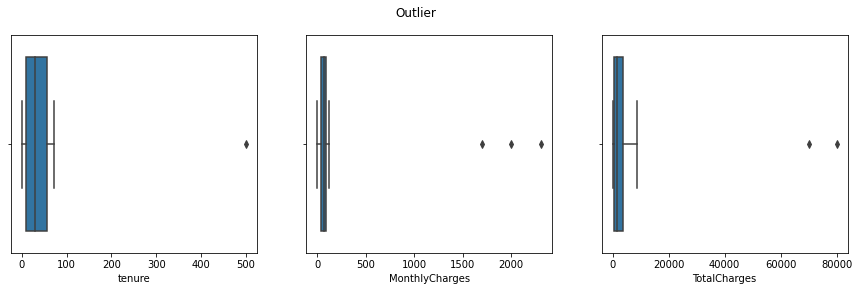

In [30]:
plt.figure(1, figsize=(15,4))
plt.suptitle('Outlier')
plt.subplot(1,3,1)
f1 = sns.boxplot(x=df_load['tenure'])

plt.subplot(1,3,2)
f2 = sns.boxplot(x=df_load['MonthlyCharges'])

plt.subplot(1,3,3)
f3 = sns.boxplot(x=df_load['TotalCharges'])
plt.show()

The black dimond symbol indicates the outliers in these variables. Remove these outliers by using Interquartile Range (IQR) method.

In [31]:
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5 * IQR)
print('Q3')
print(maximum)
minimum = Q1 - (1.5 * IQR)
print('\nQ1')
print(minimum)

more_than = (df_load > maximum)
lower_than = (df_load < minimum)
df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)

Q3
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Q1
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64


In [32]:
df_load[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,32.423165,64.992201,2286.058750
std,24.581073,30.032040,2265.702553
min,0.000000,0.000000,19.000000
25%,9.000000,36.462500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.850000,3799.837500
max,124.000000,169.931250,8889.131250


Check the outliers after removed

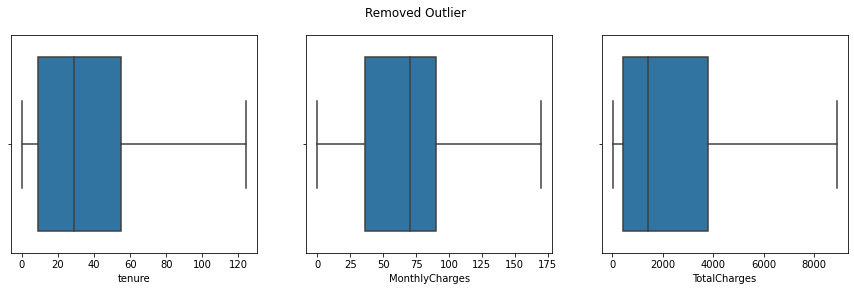

In [33]:
plt.figure(2, figsize=(15,4))
plt.suptitle('Removed Outlier')
plt.subplot(1,3,1)
f4 = sns.boxplot(x=df_load['tenure'])

plt.subplot(1,3,2)
f5 = sns.boxplot(x=df_load['MonthlyCharges'])

plt.subplot(1,3,3)
f6 = sns.boxplot(x=df_load['TotalCharges'])
plt.show()

The outliers have been removed. Aswe can see, there is no diamond symbol anymore in these box plot. Check the non-standard categories in object variable type

In [34]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6950 entries, 0 to 2360
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6950 non-null   int64  
 1   customerID        6950 non-null   object 
 2   gender            6950 non-null   object 
 3   SeniorCitizen     6950 non-null   int64  
 4   Partner           6950 non-null   object 
 5   Dependents        6950 non-null   object 
 6   tenure            6950 non-null   float64
 7   PhoneService      6950 non-null   object 
 8   MultipleLines     6950 non-null   object 
 9   InternetService   6950 non-null   object 
 10  OnlineSecurity    6950 non-null   object 
 11  OnlineBackup      6950 non-null   object 
 12  DeviceProtection  6950 non-null   object 
 13  TechSupport       6950 non-null   object 
 14  StreamingTV       6950 non-null   object 
 15  StreamingMovies   6950 non-null   object 
 16  Contract          6950 non-null   object 


In [37]:
list_col = df_load.columns.tolist()

for col_name in list_col:
	print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
	print(df_load[col_name].unique())

# for col_name in list(['gender','SeniorCitizen','Partner',
# 'Dependents','PhoneService','MultipleLines','InternetService',
# 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
# 'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
# 	print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
# 	print(df_load[col_name].value_counts())


Unique Values Count Before Standardized  Variable UpdatedAt
[202006]

Unique Values Count Before Standardized  Variable customerID
['45759018157' '45758152256' '45410681487' ... '45798912758' '45510338384'
 '45706408335']

Unique Values Count Before Standardized  Variable gender
['Female' 'Male' 'Laki-Laki' 'Wanita']

Unique Values Count Before Standardized  Variable SeniorCitizen
[0 1]

Unique Values Count Before Standardized  Variable Partner
['Yes' 'No']

Unique Values Count Before Standardized  Variable Dependents
['No' 'Yes' 'Iya']

Unique Values Count Before Standardized  Variable tenure
[  1.  60.  39.  12.  71.  19.  31.  69.  46.  72.  50.  56.  64.  36.
  20.  38.  66.  65.  58.  32.   6.  44.   5.  33.  68.   4.  23.  11.
   9.  22.  35.   2.  34.  15.  24.  49.  30.  10.  43.  26.  25.  13.
  51.  67.  70.   8.  42.  18.  27.  54.  21.  59.  52.  16.  37.   7.
  41.  48.  57.  63.  53.   3.  62.  55.  61.  28.  17.  45.  29.  40.
  47.  14.   0. 124.]

Unique Values Count 

Standarization categories

In [38]:
df_load = df_load.replace(
    ['Wanita','Laki-Laki','Churn','Iya','No internet service','No phone service'],
    ['Female','Male','Yes','Yes','No','No']
    )

After satndarization

In [40]:
for col_name in list_col:
	print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
	print(df_load[col_name].unique())

# for col_name in list(['gender','Dependents','Churn']):
# 	print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
# 	print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable UpdatedAt
[202006]

Unique Values Count After Standardized Variable customerID
['45759018157' '45758152256' '45410681487' ... '45798912758' '45510338384'
 '45706408335']

Unique Values Count After Standardized Variable gender
['Female' 'Male']

Unique Values Count After Standardized Variable SeniorCitizen
[0 1]

Unique Values Count After Standardized Variable Partner
['Yes' 'No']

Unique Values Count After Standardized Variable Dependents
['No' 'Yes']

Unique Values Count After Standardized Variable tenure
[  1.  60.  39.  12.  71.  19.  31.  69.  46.  72.  50.  56.  64.  36.
  20.  38.  66.  65.  58.  32.   6.  44.   5.  33.  68.   4.  23.  11.
   9.  22.  35.   2.  34.  15.  24.  49.  30.  10.  43.  26.  25.  13.
  51.  67.  70.   8.  42.  18.  27.  54.  21.  59.  52.  16.  37.   7.
  41.  48.  57.  63.  53.   3.  62.  55.  61.  28.  17.  45.  29.  40.
  47.  14.   0. 124.]

Unique Values Count After Standardized Variable PhoneService


We have 6950 rows data as final result of data cleansing process.

In [41]:
df_load.shape

(6950, 22)